In [10]:
  !mkdir -p ~/.kaggle
  !cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 40.8MB/s]
100% 1.06G/1.06G [00:29<00:00, 39.1MB/s]


In [12]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers import BatchNormalization, Dropout

In [14]:
#generators
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# Normalise
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [23]:
# Making the CNN Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))



In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 111ms/step - loss: 1.4362 - accuracy: 0.5974 - val_loss: 0.6430 - val_accuracy: 0.6246
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5833 - accuracy: 0.6984 - val_loss: 0.5661 - val_accuracy: 0.7144
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4958 - accuracy: 0.7624 - val_loss: 0.9691 - val_accuracy: 0.5418
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.4464 - accuracy: 0.7925 - val_loss: 0.8096 - val_accuracy: 0.5858
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3848 - accuracy: 0.8306 - val_loss: 0.7692 - val_accuracy: 0.6886
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3106 - accuracy: 0.8673 - val_loss: 0.4486 - val_accuracy: 0.7960
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2321 - accuracy: 0.9034 - val_loss: 0.8593 - val_ac

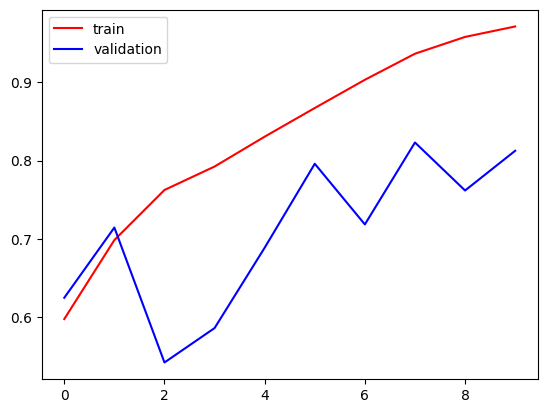

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

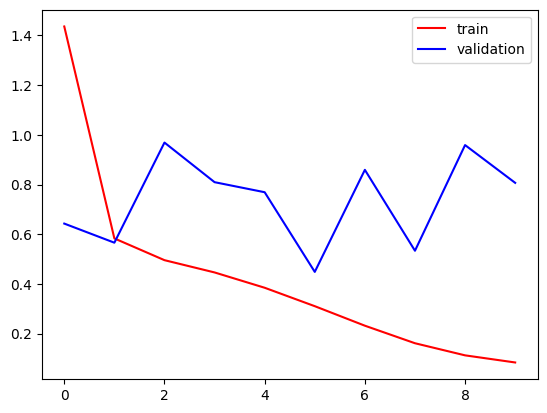

In [28]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [29]:
import cv2

In [30]:
test_img = cv2.imread('/content/cat.jpeg')

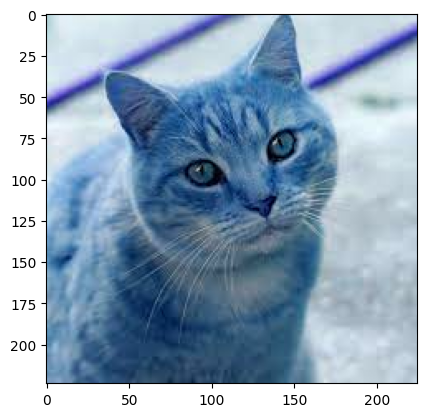

In [31]:
plt.imshow(test_img)

In [32]:
test_img.shape

(224, 225, 3)

In [33]:
test_img = cv2.resize(test_img,(256,256))

In [34]:
test_input = test_img.reshape((1,256,256,3))

In [35]:
model.predict(test_input)

1/1 [==============================] - 0s 440ms/step


array([[0.]], dtype=float32)